# Predicting Heart Disease using machine learning

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem definition

Binary classification prediction whether or not patient has heart disease based on their medical attributes.

## 2. Data
UCI heart disease dataset -- https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation

Minimize False Negative
> 95% Accuracy as a proof of concept. Evaluation metric is **Recall**

## 4. Features

Attribute Information:

Only 14 attributes used:
1. age -- age in years.
2. sex -- sex (1 = male; 0 = female)
3. cp -- chest pain type
    1. Value 1: typical angina
    2. Value 2: atypical angina
    3. Value 3: non-anginal pain
    4. Value 4: asymptomatic
4. trestbps --resting blood pressure (in mm Hg on admission to the hospital)
5. chol -- serum cholestoral in mg/dl
6. fbs -- fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg -- resting electrocardiographic results
     1. Value 0: normal
     2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
     3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach -- maximum heart rate achieved
9. exang -- exercise induced angina (1 = yes; 0 = no)
10. oldpeak -- ST depression induced by exercise relative to rest
11. slope -- the slope of the peak exercise ST segment
     1. Value 1: upsloping
     2. Value 2: flat
     3. Value 3: downsloping
12. ca -- number of major vessels (0-3) colored by flourosopy
13. thal
    1. 3: normal
    2. 6: fixed defect
    3. 7: reversable defect
14. target - the predicted attribute (1 = has heart disease, 0 = is healthy)

## 5. Modeling

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_roc_curve

In [15]:
df = pd.read_csv('../data/heart-disease.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [14]:
df.shape, df.dtypes

((303, 14),
 age           int64
 sex           int64
 cp            int64
 trestbps      int64
 chol          int64
 fbs           int64
 restecg       int64
 thalach       int64
 exang         int64
 oldpeak     float64
 slope         int64
 ca            int64
 thal          int64
 target        int64
 dtype: object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

1    165
0    138
Name: target, dtype: int64


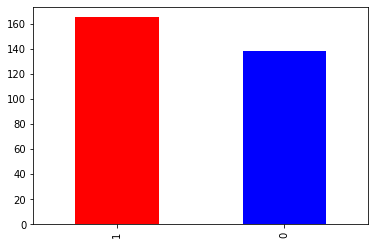

In [25]:
print(df.target.value_counts())
df.target.value_counts().plot(kind='bar', color=['red', 'blue']);

In [26]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
